In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle
import random
import copy

In [2]:
src_dir = '/DATA5_DB8/data/zdcheng/hyperthyreosis_eye/SCUT-FBP5500_v2/Images/'
point_dictf = '/DATA5_DB8/data/zdcheng/hyperthyreosis_eye/SCUT-FBP5500_v2/landmark.dict'
img_list = os.listdir(src_dir)
img_list = [i for i in img_list if i.endswith('jpg')]
with open(point_dictf,'rb') as f:
    points_dict = pickle.load(f)

In [3]:
random.seed(35)
idx = random.randint(0,len(img_list))
img_path = img_list[idx]
points = points_dict[img_list[idx]]
all_img_path = os.path.join(src_dir, img_path)

In [4]:
img = cv2.imread(all_img_path)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

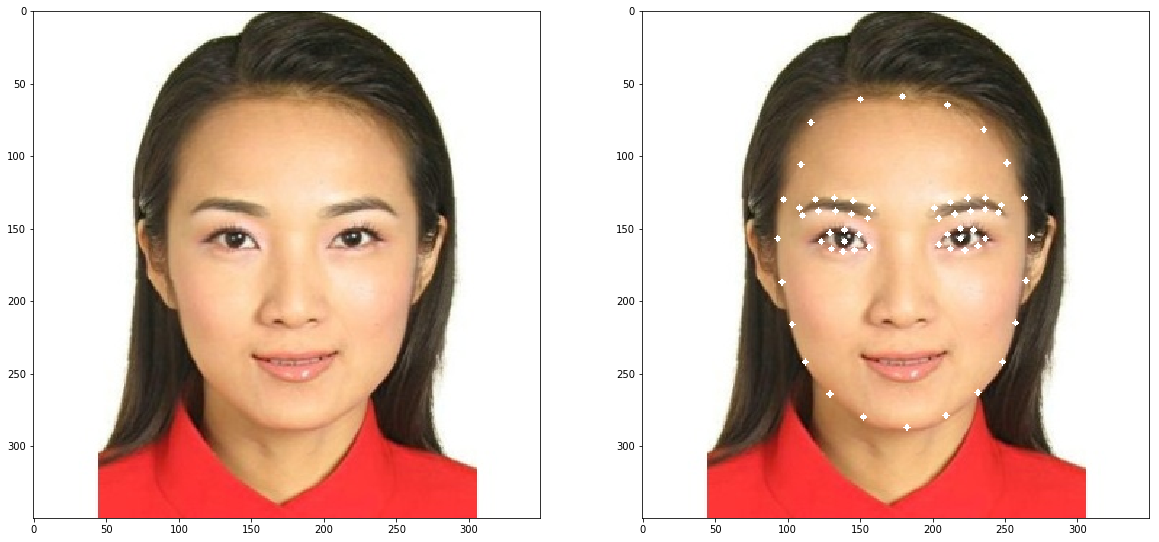

In [5]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
img_RGBpt = copy.deepcopy(img_RGB)

white = (255,255,255)
for idx,p in enumerate(points):
    tmp_p = (p[0],p[1])
    if idx > 59:
        break
    cv2.circle(img_RGBpt,tmp_p,2,white,-1)
    
ax1.imshow(img_RGB)
ax2.imshow(img_RGBpt)


In [6]:
xs = points[:,0]
ys = points[:,1]

In [7]:
min_x = np.amin(xs[22:60])
max_x = np.amax(xs[22:60])

#左眉毛从左到右的五个点，由原来五个点的坐标取平均
eyebrow_left = (points[26:21:-1,:] + points[27:32,:])/2
eyebrow_right = (points[36:31:-1,:] + points[37:42,:])/2
eye_length = (points[42,0] - points[46,0] + points[50,0] - points[54,0]) / 2

min_y = min(np.amin(eyebrow_left[:,1]), np.amin(eyebrow_right[:,1]))
max_y = np.amax(ys[22:60])

crop_min_y = int(max(min_y,0))
crop_max_y = int(min(2*max_y - min_y, img.shape[0]-1)) #向下延伸一倍

crop_min_x = int(max(0, int(min_x - eye_length* 1/4)))
crop_max_x = int(min(int(max_x + eye_length* 1/4), img.shape[1]-1))

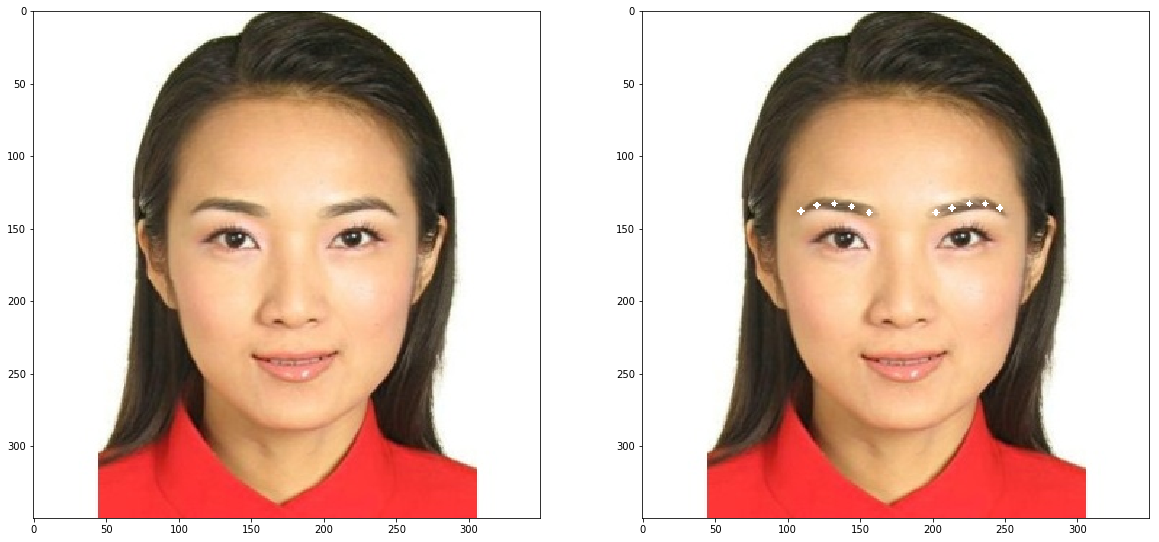

In [12]:
eyebrow_left_int = eyebrow_left.astype(np.int)
eyebrow_right_int = eyebrow_right.astype(np.int)

fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
img_RGBpteyebr = copy.deepcopy(img_RGB)

white = (255,255,255)
for idx,p in enumerate(eyebrow_left_int):
    tmp_p = (p[0],p[1])
    if idx > 59:
        break
    cv2.circle(img_RGBpteyebr,tmp_p,2,white,-1)
for idx,p in enumerate(eyebrow_right_int):
    tmp_p = (p[0],p[1])
    if idx > 59:
        break
    cv2.circle(img_RGBpteyebr,tmp_p,2,white,-1)
    
ax1.imshow(img_RGB)
ax2.imshow(img_RGBpteyebr)

In [9]:
eyebrow_left

array([[109. , 138.5],
       [120. , 134. ],
       [132.5, 133.5],
       [144.5, 135.5],
       [156.5, 139.5]])

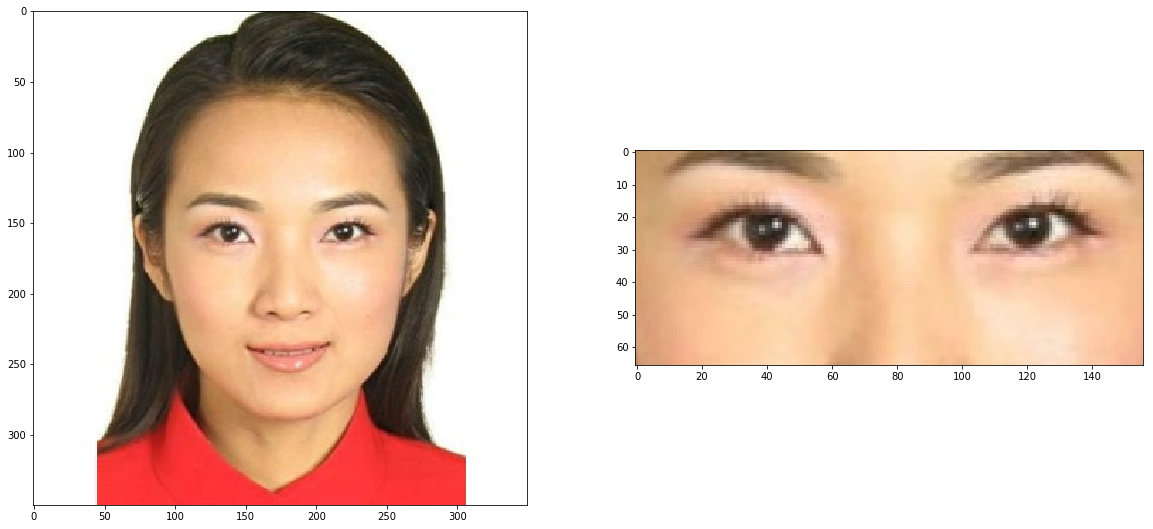

In [10]:
crop_img_RGB = img_RGB[crop_min_y:crop_max_y,crop_min_x:crop_max_x,:]
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(img_RGB)
ax2.imshow(crop_img_RGB)

In [11]:
max_y

166

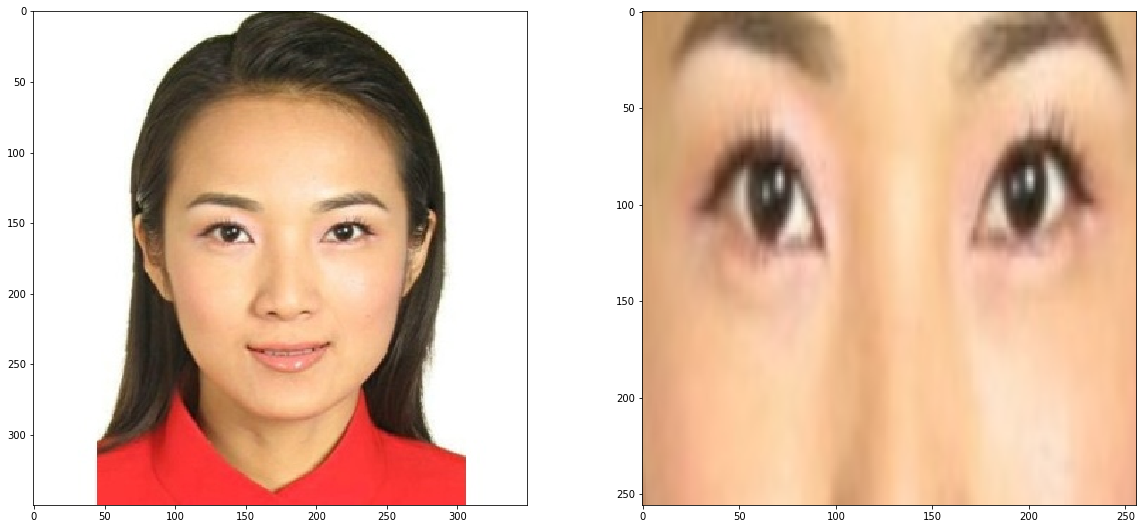

In [13]:
resize_crop_img_RGB = cv2.resize(crop_img_RGB,(256,256))
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(img_RGB)
ax2.imshow(resize_crop_img_RGB)